# 3. Perform the following on the titanic Dataset ---->

### a].Perform Exploratory Data Analysis (EDA) and Uni-variate, Bi-variate, and Multi-variate Analysis .
### b]. give a code for create a histogram for the fare column. What insights can u draw from the distribution?
### c]. Explore the correlation b/w 'Pclass' & 'Survived'. What does the correlation value indicate about their relationship?
### d]. Compare the survival rates b/w female & male passengers using a stacked bar chart.
### e]. Use boxplot to identify outliers in the 'Fare' column . Apply the suitable  method to remove outliers & compare the summary statistics before & after the treatment .
### f]. Display the number of missing values for each feature in the dataset. Handle the missing value by imputing missing values by imputing missing values with arbitrary value , mean & median.

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
data=pd.read_csv('C:/Titanic-Dataset.csv') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: title={'center': 'Heatmap for isna function'}>

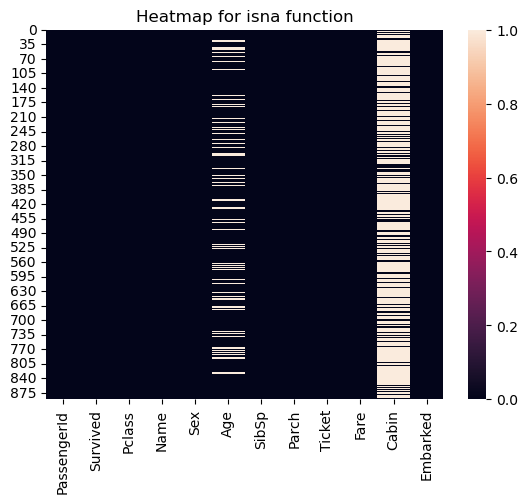

In [10]:
plt.title("Heatmap for isna function")
sns.heatmap(data.isna())

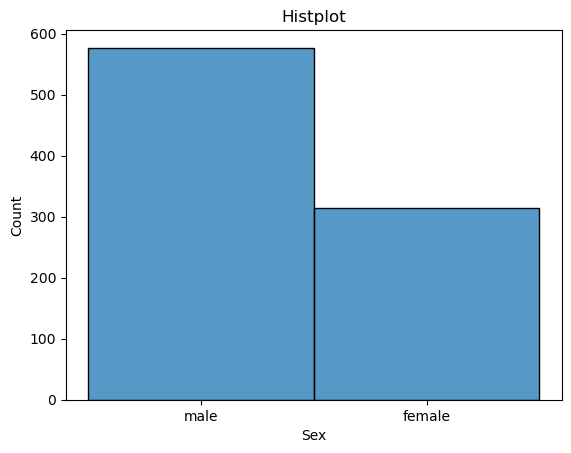

In [12]:
# Univariate ---
plt.title("Histplot")
g=sns.histplot(x='Sex', data=data)

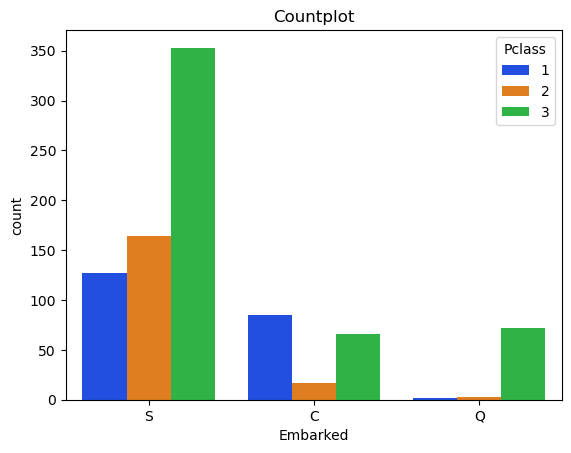

In [28]:
# bivariate ----
plt.title("Countplot")
sns.countplot(x='Embarked', hue='Pclass',palette = 'bright' , data=data)
plt.show()

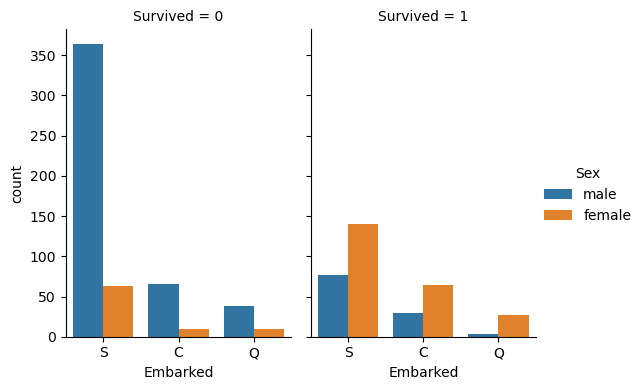

In [30]:
# Multivariate ----
g=sns.catplot(x="Embarked", hue="Sex", col="Survived",data=data,kind="count", height=4, aspect=.7)

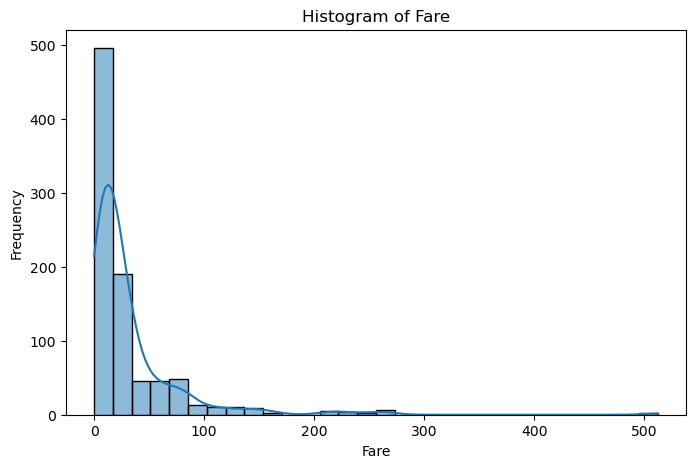

In [32]:
# 1. Histogram for the Fare Column -----

plt.figure(figsize=(8,5))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title("Histogram of Fare")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Correlation between Pclass and Survived:
             Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000


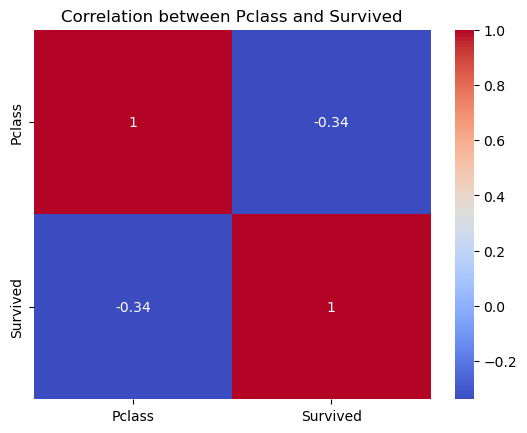

In [34]:
# 2. Correlation b/w Pclass & Survived columns ----

correlation = data[['Pclass', 'Survived']].corr()
print("Correlation between Pclass and Survived:\n", correlation)

# Heatmap for visualization
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Pclass and Survived')
plt.show()


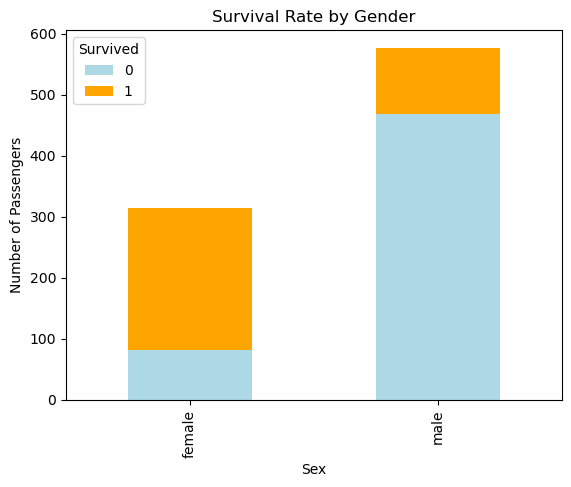

In [36]:
# 3. Stacked Bar Chart : Comparing Survival Rates b/w Male & Female Passengers --

survived_sex = pd.crosstab(data['Sex'], data['Survived'])

survived_sex.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Survival Rate by Gender')
plt.ylabel('Number of Passengers')
plt.show()


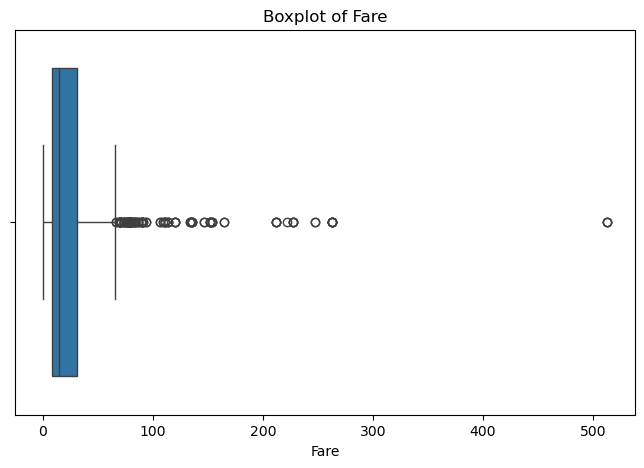

Summary statistics before removing outliers:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Summary statistics after removing outliers:
 count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64


In [38]:
# 4. Boxplot for Identifying Outliers in the Fare Column & Removing Them ----

# Boxplot for identifying outliers in 'Fare'
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Removing outliers using the IQR method
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Defining limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Compare the summary statistics before and after removing outliers
print("Summary statistics before removing outliers:\n", data['Fare'].describe())
print("\nSummary statistics after removing outliers:\n", data_no_outliers['Fare'].describe())


In [40]:
# 5. Display the number of missing values for each feature -----

missing_values = data.isnull().sum()
print("Number of missing values for each feature:\n", missing_values)

# Imputing missing values with arbitrary value, mean, and median
# Arbitrary value imputation
data['Age_arbitrary'] = data['Age'].fillna(-1)

# Mean imputation
data['Age_mean'] = data['Age'].fillna(data['Age'].mean())

# Median imputation
data['Age_median'] = data['Age'].fillna(data['Age'].median())

# Checking the updated data
print(data[['Age', 'Age_arbitrary', 'Age_mean', 'Age_median']].head(10))


Number of missing values for each feature:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    Age  Age_arbitrary   Age_mean  Age_median
0  22.0           22.0  22.000000        22.0
1  38.0           38.0  38.000000        38.0
2  26.0           26.0  26.000000        26.0
3  35.0           35.0  35.000000        35.0
4  35.0           35.0  35.000000        35.0
5   NaN           -1.0  29.699118        28.0
6  54.0           54.0  54.000000        54.0
7   2.0            2.0   2.000000         2.0
8  27.0           27.0  27.000000        27.0
9  14.0           14.0  14.000000        14.0


In [42]:
data_drop=data.dropna(subset = ['Cabin','Embarked','Age'])
print(data_drop.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Age_arbitrary    0
Age_mean         0
Age_median       0
dtype: int64
